# Flat Files
- Simple, easy-to-produce format
- Data stored as plain text (no formatting)
- One row per line
- Values for different fields are separeted by a delimiter
- Most common flat file type: comma-separated values
- One <code>pandas</code> function to load them all: <code>read_csv()</code>

In [9]:
import pandas as pd

In [5]:
tax_data = pd.read_csv('datasets/vt_tax_data_2016.csv')
tax_data.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,...,39170,731963,40,24,0,0,12500,67761,23320,103034


<AxesSubplot:xlabel='agi_stub'>

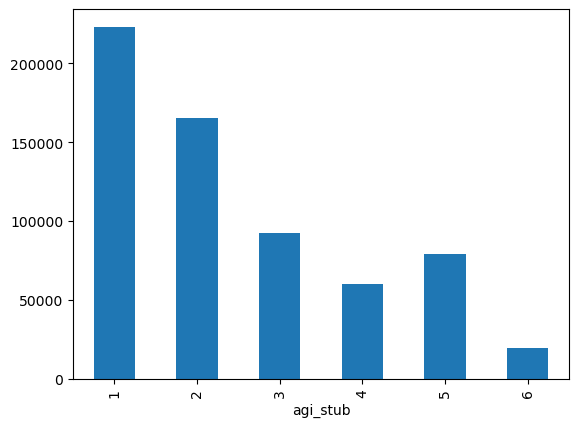

In [10]:
# Plot the total number of tax returns by income group
counts = tax_data.groupby('agi_stub').N1.sum()
counts.plot.bar()

**Limiting Columns**
- Choose columns to load with the <code>usecols</code> keyword argument
- Accepts a list of column numbers or names, or a function to filter column names

In [16]:
col_names = ['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1']

# Choose columns to load by name
tax_data_v1 = pd.read_csv('datasets/vt_tax_data_2016.csv', 
                          usecols=col_names)

tax_data_v1.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1
0,50,VT,0,1,111580
1,50,VT,0,2,82760
2,50,VT,0,3,46270
3,50,VT,0,4,30070
4,50,VT,0,5,39530


**Limiting Rows**
- Limite the number of rows loaded with the <code>nrows</code> keyword argument


In [21]:
tax_data_first1000 = pd.read_csv('datasets/vt_tax_data_2016.csv', 
                                 nrows=1000)

print(tax_data_first1000.shape)

(1000, 147)


- Use <code>nrows</code> and <code>skiprows</code> together to process a file in chunks
- <code>skiprows</code> accepts a list of row numbers, a number of rows, or a function to filter rows
- Set <code>header=None</code> so <code>pandas</code> knows there are no column names

In [22]:
tax_data_next500 = pd.read_csv('datasets/vt_tax_data_2016.csv',
                              nrows=500,
                              skiprows=1000,
                              header=None)
tax_data_next500.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,50,VT,5730,4,20,0,0,0,40,40,...,0,0,0,0,0,0,0,0,0,0
1,50,VT,5730,5,30,0,30,0,0,70,...,30,1046,0,0,0,0,0,0,20,71
2,50,VT,5730,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50,VT,5732,1,200,150,30,30,100,260,...,110,104,0,0,0,0,20,20,160,250
4,50,VT,5732,2,120,70,30,0,60,200,...,110,294,0,0,0,0,0,0,110,215


**Assigning Columns Names**
- Supply column names by passing a list to the <code>names</code> argument
- The list **MUST** have a name of every column in your data
- **If you only need to rename a few columns, do it after the import**

In [26]:
col_names = list(tax_data_first1000)
tax_data_next500 = pd.read_csv('datasets/vt_tax_data_2016.csv',
                              nrows=500,
                              skiprows=1000,
                              header=None,
                              names=col_names)

tax_data_next500.head(1)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,5730,4,20,0,0,0,40,40,...,0,0,0,0,0,0,0,0,0,0


**Common Flat File Import Issues**
- Column data types are wrong
- Values are missing
- Records that cannot be read by <code>pandas</code>

**Specifying Data Types**
- <code>pandas</code> automatically infers column data types

In [27]:
# zipcode is not a int64, is a string.
print(tax_data.dtypes)

STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object


- Use the <code>dtype</code> keyword argument to specify column data types
- <code>dtype</code> takes a dictionary of column names and data types.

In [29]:
tax_data = pd.read_csv('datasets/vt_tax_data_2016.csv', 
                       dtype={'zipcode':str})

print(tax_data.dtypes)

STATEFIPS     int64
STATE        object
zipcode      object
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object


**Customizing Missing Data Values**
- <code>pandas</code> automatically interprets some values as missing or NA

In [31]:
tax_data.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,...,39170,731963,40,24,0,0,12500,67761,23320,103034


- Use the <code>na_values</code> leyword argument to set custom missing values
- Can pass a single value, list, or dictionary of columns and values

In [35]:
tax_data = pd.read_csv('datasets/vt_tax_data_2016.csv',
                      na_values={'zipcode':0})

tax_data[tax_data.zipcode.isna()]

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,NaN,1,111580,85090,14170,10740,45360,130630,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,NaN,2,82760,51960,18820,11310,35600,132950,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,NaN,3,46270,19540,22650,3620,24140,91870,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,NaN,4,30070,5830,22190,960,16060,71610,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,NaN,5,39530,3900,33800,590,22500,103710,...,39170,731963,40,24,0,0,12500,67761,23320,103034
5,50,VT,NaN,6,9620,600,8150,0,7040,26430,...,9600,894432,3350,4939,4990,20428,3900,93123,2870,39425


**Lines with Errors**
- Set <code>error_bad_lines=False</code> to skip unparseable records
- Set <code>warn_bad_lines=True</code> to see messages when records are skipped

Example: 

<code>tax_data = pd.read_csv('us_tax_data_2016_corrupt.csv', error_bad_lines=False, warn_bad_lines=True)</code>